# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [2]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)


# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [3]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [4]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [5]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [6]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [7]:
# Check the result:

A @ x - b

array([ 1.11022302e-16,  1.11022302e-16, -1.11022302e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.38777878e-17,  0.00000000e+00,
       -4.16333634e-17,  1.11022302e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


[ 6.93889390e-18  0.00000000e+00 -6.93889390e-18  0.00000000e+00
 -6.93889390e-18 -1.13841228e-18 -8.67361738e-19  0.00000000e+00
 -8.67361738e-19  2.08166817e-17] 0.36436161983015336
[nan nan nan nan nan nan nan nan nan nan] 30.715327603064885


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in matmul
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in matmul


'Результат расходится, ||B|| >> 1'

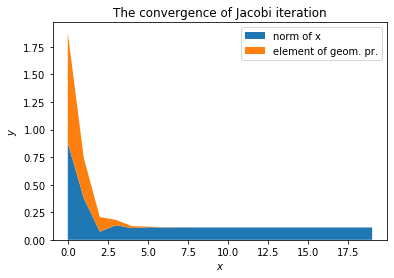

In [9]:
def Jacobi(mat, vec, n_iter = 1000):
    A = mat.copy()
    b = vec.copy()
    
    "создаем D и D^(-1)"
    D = A.copy()
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if i != j:
                D[i][j] = 0
    
    invD = np.linalg.inv(D)
    
    "создаем D - A"
    preB = -A.copy()
    np.fill_diagonal(preB, 0)
    
    B = invD @ preB
    c = invD @ b
    
    B_norm = np.linalg.norm(B)
    
    x0 = np.ones(b.size)
    x = x0
    y = np.zeros(n_iter)
    q = np.ones(n_iter)
    
    for i in range (n_iter):
        x = B @ x + c
        y[i] = np.linalg.norm(x)
        if i > 0:
            q[i] = B_norm*q[i-1]
        
    return x, B_norm, y, q

"проверка результата"
x_ok = np.linalg.solve(A, b)
x_my, B_norm, y, q = Jacobi(A, b)
print(x_my - x_ok, B_norm)

"Иллюстрация сходимости. Построим график нормы вектора x от номера итерации. На том же графике изобразим член геометрической"
"прогрессии со знаменателем ||B||"
import matplotlib.pyplot as plt

x1 = np.arange(0, 20)
y1 = np.zeros(x1.size)
q1 = np.zeros(x1.size)

for i in range(x1.size):
    y1[i] = y[i]
    q1[i] = q[i]

fig, ax = plt.subplots()
ax.stackplot(x1, y1, q1, labels = ['norm of x', 'element of geom. pr.'])
ax.set_title('The convergence of Jacobi iteration')
ax.legend(loc = 'upper right')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.plot()

"Визуально подтвердим: метод сходится очень быстро (меньше, чем за 20 итераций), причем примерно"
"с той же скоростью (что можно доказать точно), что и геом. прогрессия с q = ||B||"


"Испортим A и с помощью этого посчитаем не диагонально доминантную матрицу"
A_bad = A - np.diagflat([15]*n)
x_ok = np.linalg.solve(A_bad, b)
x_my, B_norm, y, q = Jacobi(A_bad, b)
print(x_my - x_ok, B_norm)

"Результат расходится, ||B|| >> 1"




# II. Seidel's iteration.

### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

0.17038846684079478 [-0.01333028 -0.01165863  0.02527101  0.05206006  0.03204919] [0.00276488 0.00359767 0.0400433  0.06742527 0.04776439] 0.06848097900918686 0.09193289778759758


'алгос сходится куда-то непонятно куда'

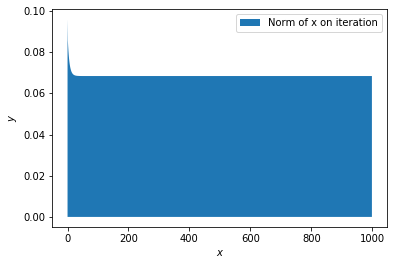

In [20]:
def Seidel(mat, vec, n_iter = 1000):
    A = mat.copy()
    b = vec.copy()
    n = b.size
    
    'надо выделить нижнетреугольную (вместе с диагональю) и верхнетреугольную части A - L и U соответственно'
    L = A.copy()
    U = A.copy()
    
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if i >= j:
                U[i][j] = 0
            else:
                L[i][j] = 0
                
    'Заготовим объяснялку, почему ничего не сходится'
    M = - np.linalg.inv(L) @ U
    m = np.linalg.norm(M)
                
    'теперь надо написать сам итеративный процесс'
    x_old = np.zeros(n)
    x_new = x_old.copy()
    s = 0
    y = np.zeros(n_iter)
    
    'для варианта расчета с заданной точностью'
    #eps = 10^(-5)
    #Flag = True
    
    #while Flag:
    for j in range(n_iter):
        for i in range(n):
            if i > 0:
                s += L[i][i-1] * x_new[i-1]
            x_new[i] = (- U[i, :] @ x_old + b[i] - s) / L[i][i]
            
            #Flag = np.linalg.norm(x_old - x_new) > eps
            
        x_old = x_new.copy()
        y[j] = np.linalg.norm(x_old)

    return x_new, m, y

"проверим себя, сгенерировав рандомную матрицу M и вектор v"
n = 5
M = rndm.uniform(size=(n, n)) + 13*np.eye(n)
v = rndm.uniform(size=n)

x_ok = np.linalg.solve(M, v)
x_my, m, y = Seidel(M, v)
print(m, x_my, x_ok, np.linalg.norm(x_my), np.linalg.norm(x_ok))

'посмотрим, как ведут себя итерации вообще'
x = np.arange(1000)

fig1, ax1 = plt.subplots()
ax1.stackplot(x, y, labels = ['Norm of x on iteration'])
ax1.legend(loc = 'upper right')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

'алгос сходится куда-то непонятно куда'

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

[-0.7180427  -0.38892751 -1.06276321  2.85474803 -1.78753629]


'опять все расходится'

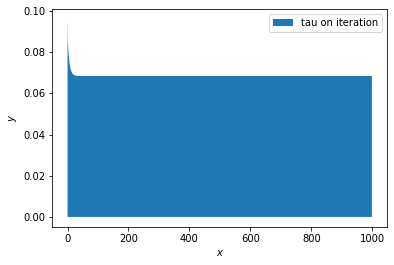

In [33]:
def MRS(mat, vec, eps = 10^(-3)):
    A = mat.copy()
    b = vec.copy()
    
    n = b.size
    
    x_old = np.ones(n)
    x_new = x_old.copy()
    y = np.zeros(1000)
    
    Flag = True
    
    #while Flag:
    for i in range(1000):
        r = A @ x_old - b
        tau = (r @ A @ r) / (np.linalg.norm(A @ r))**2
        x_new = x_old - tau * r
        
        y[i] = tau
        
        #if np.linalg.norm(x_old - x_new) < eps:
           # Flag = False
            
        x_old = x_new.copy()
    
    return x_new

n = 5
M = rndm.uniform(size=(n, n))
v = rndm.uniform(size=n)

x_ok = np.linalg.solve(M, v)
x_my = MRS(M, v)

print(x_ok - x_my)

x = np.arange(1000)

fig2, ax2 = plt.subplots()
ax2.stackplot(x, y, labels = ['tau on iteration'])
ax2.legend(loc = 'upper right')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')

'опять все расходится'
